# 计算物理第一次作业


In [123]:
#!/usr/bin/env python

# 利用递推关系就可以，不需要使用对数

# 阶乘
def fac(i):
    if i==0:
        return 1
    else:
        return i*(fac(i-1))

tmp = 1
for i in range(0,11):
    print("Dimension:"+str(i),"det(H)="+str(tmp))
    tmp = (fac(i)**4) /(fac(2*i + 1)* fac(2*i))* tmp
    

Dimension:0 det(H)=1
Dimension:1 det(H)=1.0
Dimension:2 det(H)=0.08333333333333333
Dimension:3 det(H)=0.000462962962962963
Dimension:4 det(H)=1.6534391534391535e-07
Dimension:5 det(H)=3.749295132515087e-12
Dimension:6 det(H)=5.367299887358688e-18
Dimension:7 det(H)=4.835802623926117e-25
Dimension:8 det(H)=2.7370501137915134e-33
Dimension:9 det(H)=9.720234311925e-43
Dimension:10 det(H)=2.1641792264314924e-53


## 以下是解方程需要用到的函数
    具体功能和注意事项均在注释。此处没有使用任何的为矩阵运算优化的包。
    使用了串行的编程模式来实现矩阵的各种运算，故程序效率不高，但是基本功能可以实现。

In [125]:
def transpose(A):
    # To transpose a matrix.
    # return type: List
    m = len(A); n = len(A[0])
    B = []; tmp = []
    
    for i in range(n):
        for j in range(m):
            tmp.append(A[j][i])
        B.append(tmp)
        tmp = []
    return B

def findMax(a,startingIdx):
    # 用于列支点遴选，用于找到列最大元以及其下标, max_{startingIdx<=r<=n} a_{ri}
    # arg type : a - list,  startingIdx - int
    # return type:   maxidx - int, maxnum - float(same as data in a)
    n = len(a)
    maxnum = -1
    maxidx = -1
    for i in range(startingIdx,n):
        if a[i]>maxnum:
            maxnum=a[i]
            maxidx=i;
    return maxidx,maxnum

def swap(vector,i,j):
    # 交换两个向量的值
    tmp = vector[i]
    vector[i] = vector[j]
    vector[j] = tmp

def shape(A):
    # 得到一个矩阵的尺寸
    m = len(A)
    n = len(A[0])
    return m,n

def mdot(A,B):
    # 矩阵乘法,如果不符合矩阵要求则报错
    # 注意： 若输入矩阵为一维，则需要将每一维的元素从int转为list才能正常进行运算
    Am, An = shape(A)
    Bm, Bn = shape(B)
    C = []
    if(An!=Bm):
        print("Wrong dimension.\n")
        return
    else:
        for i in range(Am):
            tmplist = []
            for j in range(Bn):
                tmp = 0
                for k in range(An):
                    tmp += A[i][k]*B[k][j]
                tmplist.append(tmp)
            C.append(tmplist)
        return C

def multiply(scale,array):
    # 矢量数乘
    n =len(array)
    ans = []
    for i in range(n):
        ans.append(array[i] * scale)
    return ans

def add(va,vb):
    # 向量加法，element-wise add
    n =len(va)
    ans = []
    for i in range(n):
        ans.append(va[i] + vb[i])
    return ans

def solveL(L,b):
    # 解下三角线性方程组，要求L为下三角方阵，Lx=b，返回x
    # return type: list
    n = len(L)
    for i in range(n-1):
        b[i] /= L[i][i]
        for j in range(i+1,n):
            b[j] -= b[i]*L[j][i]
    b[n-1] /= L[n-1][n-1]
    return b
    
def solveU(U,b):
    # 回代法求解上三角线性方程组，要求U为上三角方阵，Ux=b，返回x
    # return type: list
    n = len(U)
    i = n-1
    while i >= 0:
        b[i] /= U[i][i]
        for j in range(i):
            b[j] -= U[j][i]*b[i]
        i -= 1 结果
    b[0] /= U[0][0]
    return b
    
def GEM(_A,_b):
    # 带部分指点遴选的高斯消元法解Ax=b
    # return type: x - list
    A = _A; b = _b;
    n = len(b)
    x = b
    j = 0
    for i in range(n):
        idx, pivot = findMax(transpose(A)[i],i)
        if idx!=i:
            swap(A,i,idx)
            swap(b,i,idx)
        for j in range(i+1,n):
            ratio = A[j][i]/pivot
            A[j] = add(A[j] , multiply(- A[j][i]/pivot , A[i]))
            b[j] = b[j] - (ratio)*b[i]
    return solveU(A,b)

def Cholesky(_A,_b):
    # Cholesky 分解杰Ax=b
    # return type: x - list
    A = _A; b = _b
    n= len(A)
    x = b
    j = 0
    for i in range(n):
        A[i][i] = A[i][i] ** 0.5
        for j in range(i+1,n):
            A[j][i] /= A[i][i]
        for j in range(i+1,n):
            A[i][j] = 0.
            for l in range(j,n):
                    A[l][j] = A[l][j] - A[l][i] * A[j][i]
    L = A
    return solveU(transpose(L),solveL(L,b))

def constructH(dim):
    # 构造Hilbert matrix 和b= [1,1,...,1]
    # return type: H - hilbert matrix, list
    #              b - [1,1,...,1], list
    H = []
    b = []
    for i in range(dim):
        tmp = []
        for j in range(dim):
            tmp.append(1/float(i+j+1))
        H.append(tmp)
        b.append(1)
    return H,b

In [129]:
# n 为维数，可以改变n的赋值语句来考察不同维数下得到的解
# ans_gem 为用高斯消元法得到的结果
# ans_cho 为用Cholesky分解得到的结果
n = 10
ans_gem = []
ans_cho = []
A,b = constructH(n)
ans_gem = GEM(A,b)
A,b = constructH(n)
ans_cho = Cholesky(A,b)
print(ans_gem,ans_cho)

[-9.998072679877566, 989.8336969701994, -23756.461505818555, 240207.85875270702, -1261106.8018485655, 3783359.11940464, -6726029.839673252, 7000613.364156605, -3937870.1748898993, 923703.0986491785] [-9.997668234803768, 989.7983719614995, -23755.70340866239, 240200.9288274541, -1261073.6092823984, 3783267.5764416014, -6725879.256791485, 7000467.5376583515, -3937793.4846944376, 923686.2089171143]


由上已知，两种方法得到的结果是不一样的，而且差别不小。以上是作业的基本要求。

## 拓展讨论
接下来使用python的一些包，来将两种方法在时间效率和准确度上的差别进行可视化。

In [73]:
import numpy as np
import matplotlib.pyplot as plt

NUM = 100


# 以下部分计算了维数由1到100变化，两种方法得到的结果的差的矢量的模长（L2模）
# 存储在res中。
res = np.zeros(NUM)
for i in range(1,NUM):
    n = i
    ans_gem = []
    ans_cho = []
    A,b = constructH(n)
    ans_gem = GEM(A,b)
    A,b = constructH(n)
    ans_cho = Cholesky(A,b)
    res[i-1] = np.linalg.norm(np.array(ans_gem)-np.array(ans_cho))
print(res)



[0.00000000e+00 9.93013661e-16 8.88356038e-14 1.00599584e-11
 1.77267160e-09 9.85633031e-08 1.38876811e-06 2.11098835e-04
 6.76474731e-01 2.44208275e+02 1.64009339e+04 5.48586412e+06
 3.15948037e+08 3.72443289e+10 3.13352971e+08 3.05472860e+09
 2.24213747e+09 8.25327090e+10 1.13634569e+10 3.93666508e+10
 1.59200013e+10 1.79264688e+09 1.93025478e+09 4.58389739e+09
 2.92215230e+10 7.46519092e+10 3.28917275e+09 2.02000541e+10
 5.09167886e+09 5.21261939e+09 6.94867646e+09 8.82763052e+09
 3.53016305e+10 3.06798729e+10 1.29629848e+10 1.21983361e+10
 1.82531054e+11 9.08644032e+09 2.65260335e+10 1.75002779e+10
 2.75316816e+10 2.44777799e+10 4.82919478e+10 6.09150410e+11
 2.87933072e+10 1.33610101e+10 1.06724888e+10 2.64405313e+10
 7.44723544e+09 1.07677597e+10 1.51787114e+10 1.78614858e+10
 1.30935405e+10 6.74463931e+10 1.81301007e+11 3.05482485e+10
 2.54838072e+10 1.82521247e+10 1.30744504e+10 8.23169394e+09
 7.35460389e+10 1.12647198e+10 1.58651480e+10 3.51404257e+10
 1.08452963e+11 3.272210

In [105]:
# 以下部分计算了维数由1到100变化，两种方法得到的结果运行的时间差（每个维度运行10次取平均值）
# 存储在runtimeGEM和runtimeCho中。

import time
NUM = 100
runtimeGEM = np.zeros(NUM)
runtimeCho = np.zeros(NUM)
for i in range(1,NUM):
    rep = 10
    n = i 
    tmp = 0.
    ans_gem = []
    ans_cho = []
    for j in range(rep):
        A,b = constructH(n)
        start = time.time()
        ans_gem = GEM(A,b)
        end = time.time()
        tmp += (end-start) 
    runtimeGEM[i] = tmp/rep
    
    for j in range(rep):
        A,b = constructH(n)
        start = time.time()
        ans_cho = Cholesky(A,b)
        end = time.time()
        tmp += (end-start) 
    runtimeCho[i] = tmp/rep

print(runtimeGEM,runtimeCho)


[0.00000000e+00 1.55925751e-05 4.02212143e-05 8.77618790e-05
 1.35898590e-04 1.09243393e-04 1.55591965e-04 2.41756439e-04
 2.53629684e-04 4.99582291e-04 4.09030914e-04 8.11409950e-04
 7.94410706e-04 7.78746605e-04 8.42428207e-04 8.44836235e-04
 9.66978073e-04 1.12099648e-03 1.32024288e-03 1.53484344e-03
 1.78272724e-03 2.02405453e-03 2.30145454e-03 2.60338783e-03
 2.92439461e-03 3.26614380e-03 3.68170738e-03 4.08310890e-03
 4.56891060e-03 4.99453545e-03 5.51855564e-03 1.40914679e-02
 8.30531120e-03 7.14573860e-03 8.12764168e-03 1.59949064e-02
 1.06296062e-02 1.13137245e-02 1.11858130e-02 1.35875225e-02
 1.25170231e-02 1.53093100e-02 1.43716574e-02 1.52939320e-02
 1.67095423e-02 1.73907518e-02 1.85851812e-02 2.01223135e-02
 2.46314049e-02 2.31330872e-02 2.40613937e-02 2.54089832e-02
 2.70181179e-02 3.99057388e-02 3.72655869e-02 3.88735771e-02
 4.52492714e-02 4.63193178e-02 3.76832962e-02 4.17194366e-02
 4.52279091e-02 4.42255497e-02 4.75189686e-02 5.31982660e-02
 6.05642319e-02 6.845552

/home/yipzlf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


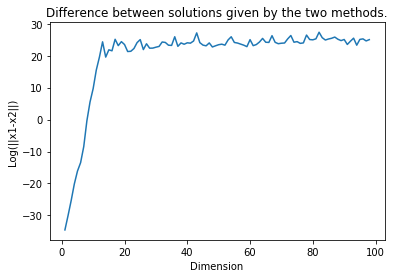

In [138]:
plt.plot(range(NUM), np.log(res))
plt.title('Difference between solutions given by the two methods.')
plt.xlabel('Dimension')
plt.ylabel('Log(||x1-x2||)')

plt.show()

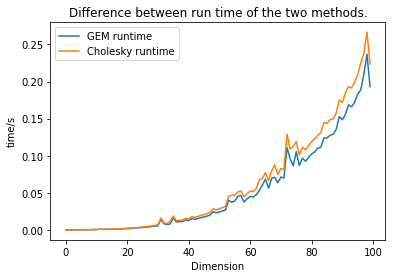

In [139]:
plt.plot(range(NUM),runtimeGEM,label='GEM runtime')
plt.plot(range(NUM),runtimeCho,label='Cholesky runtime')

plt.title('Difference between run time of the two methods.')
plt.xlabel('Dimension')
plt.ylabel('time/s')
plt.legend()
plt.show()